In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
#Create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer ( 4 features of the flower) -->
  #Hidden layer1 (no. of neurons) -->
  #H2 (n) --> Output (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [28]:
# pick a manual seed for randomization
torch.manual_seed(41)

#create an instance of model
model = Model()

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import pandas as pd

In [31]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [32]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [34]:
#Change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

<ipython-input-34-2294c6a9d00d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


In [35]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [36]:
#Train, test and split Set X-feature,y-outcome
X = my_df.drop('species', axis =1)
y = my_df['species']

In [37]:
#Convert these to numpy arrays
X=X.values
y=y.values

In [38]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [41]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [42]:
#convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [43]:
# Set the criteria of model to measure the error, how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()

#Choose  Adam Optimizer, learning rate (if error doesn't go down after a bunch of iterations (epoch))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [47]:
#Train our model
# epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forwards and get a prediction
  y_pred = model.forward(X_train) #get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs y_train

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation: take error rate of forward propagation and feed it back thru
  # the networkto fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

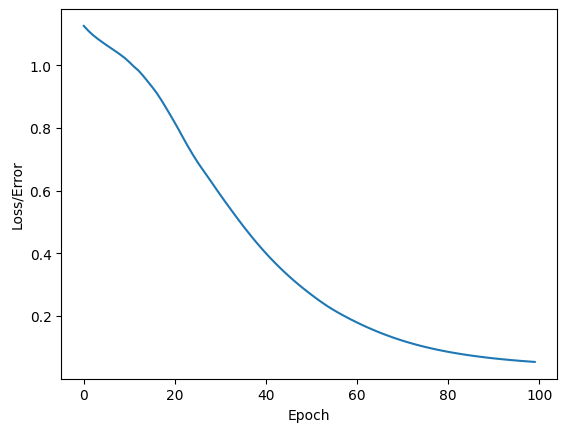

In [49]:
#Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [50]:
#Evaluate model on test data set (validate model on test data set)
with torch.no_grad(): #basically turn off back propagation
  y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test)  #Find the loss or error


In [51]:
loss

tensor(0.1315)

In [61]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'setosa   '
    elif y_test[i] == 1:
      x = 'versicolor'
    else:
      x = 'virginica'

    #will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t{x} \t{y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\nWe got {correct} correct!')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	virginica 	2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	virginica 	2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	virginica 	2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	versicolor 	1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	virginica 	2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	versicolor 	1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	virginica 	2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	versicolor 	1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	virginica 	2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	virginica 	2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	virginica 	2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	setosa    	0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	setosa    	0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	versicolor 	1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	setosa    	0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	virginica 	2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	setosa    	0 	 0
18

In [62]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [63]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [64]:
newer_iris = torch.tensor([5.9, 3.0,5.1,1.8])

In [65]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9944,  4.5077,  6.6792])


In [66]:
# Save our NN model
torch.save(model.state_dict(), 'My_Iris_Model.pt')

In [67]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('My_Iris_Model.pt'))

<ipython-input-67-1bbe02224ce7>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('My_Iris_Model.pt'))


<All keys matched successfully>

In [68]:
# make sure it loaded correctly

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)